In [29]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import panel as pn
from matplotlib import pyplot as plt
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook, show, output_file

# CYPLAN255
### Urban Informatics and Visualization

HIT RECORD and TRANSCRIBE

# Lecture 10 -- Intro to Data Visualization
*******
February 28, 2022

# Agenda
1. Announcements
2. Color theory
3. Interactive plotting
4. For next time
5. Questions


# 1. Announcements

- Irene's GitHub Pages tutorial


# 2. A bit of color theory

## 2.1. Why does color matter?

- colorblindness
- even people without colorblindness do not perceive all colors are perceived equally/evenly
- grayscale reproduction (i.e. photocopy safe)
- ?

<img src="https://bids.github.io/colormap/images/screenshots/jet.png" width=800>

In [2]:
%%html
<iframe src="https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html" width=100% height=700></iframe>

## 2.2. The Three Components of Color

1. **Hue**

In [3]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

2. **Saturation**

In [4]:
sns.color_palette("blend:grey,b", 8)

[(0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.4310957324106113, 0.4310957324106113, 0.5722722029988466),
 (0.3582622068435217, 0.3582622068435217, 0.6445367166474433),
 (0.2873971549404075, 0.2873971549404075, 0.7148481353325644),
 (0.21456362937331797, 0.21456362937331797, 0.7871126489811611),
 (0.14369857747020376, 0.14369857747020376, 0.8574240676662822),
 (0.0708650519031142, 0.0708650519031142, 0.9296885813148789),
 (0.0, 0.0, 1.0)]

3. **Lightness**

In [5]:
sns.cubehelix_palette(8, start=.25, rot=-.25, reverse=True)

[[0.1676124288206785, 0.12168378009569247, 0.24493209028077442],
 [0.25719212909752504, 0.22039345367928442, 0.3980974201030203],
 [0.3315259381236118, 0.3244953194332093, 0.5282698511453637],
 [0.4040693859926358, 0.43902378590530383, 0.6430510471441738],
 [0.4764563969141741, 0.5515570377266595, 0.7333097883591035],
 [0.5615918212430975, 0.6670782376100594, 0.8084244613507879],
 [0.6629603011558388, 0.7770571967906177, 0.8689938012762111],
 [0.7801075672866592, 0.8741945391838343, 0.9197573835143085]]

## 2.3. Color Spaces

You are all likely familiar with the concept of the color wheel. When it comes to digital imagery, we call these **color spaces** because they are typically modeled in multi-dimensional space (e.g. RGB, CMYK).

If you've ever used image editing software like Adobe Illustrator or Photoshop, this should sound familiar to you.

### 2.3.1. RGB

Almost all computers use the standard RGB color space ([sRGB](https://en.wikipedia.org/wiki/SRGB)) to render digital images on the pixels of your computer screen/monitor. The sRGB color space is often modeled as cube, with each of its three axes positioned orthogonally to the other two:

<img src=https://upload.wikimedia.org/wikipedia/commons/d/d6/RGB_color_cube.svg width=75%>

This is because the RGB system is _additive_, meaning colors are created by adding together values chosen independently along each axis.

### 2.3.2 HSL & HSV

Somewhere along the line someone decided it would be more useful to create a color space in which the component axes corresponded to the three components of human perception of color (hue, saturation, and luminosity/lightness). To do this, they went back to the basics, the color wheel, and extended it in a third dimension to create a cylindrical color space.

<img src="https://www.boronine.com/images/hsl.png">

The most common of these are the HSV and HSL (HLS) color systems:

<br><center><img src="https://upload.wikimedia.org/wikipedia/commons/a/a0/Hsl-hsv_models.svg" width=500></center>

Both are available in Seaborn. HSV is inherited from matplotlib, and HSL in built-in to Seaborn (they call it HLS):

In [6]:
sns.color_palette("hsv", 10)

[(1.0, 0.532721120956415, 0.0),
 (0.93455775808717, 1.0, 0.0),
 (0.4018366371307548, 1.0, 0.0),
 (0.0, 1.0, 0.15404569495487538),
 (0.0, 1.0, 0.6867634597860162),
 (0.0, 0.7805173926497455, 1.0),
 (0.0, 0.24779627169333063, 1.0),
 (0.30808663713075457, 0.0, 1.0),
 (0.8408077580871701, 0.0, 1.0),
 (1.0, 0.0, 0.6264711209564149)]

In [7]:
sns.color_palette("hls", 10) 

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

From the Seaborn [docs](https://seaborn.pydata.org/tutorial/color_palettes.html#using-circular-color-systems):

> When you have an arbitrary number of categories, the easiest approach to finding unique hues is to draw evenly-spaced colors in a circular color space (one where the hue changes while keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.


### 2.3.3 HUSL/HSLuv

One of the problems with the standard color wheel, however, is that not all colors are perceived equally well, even if they have the same saturation and brightness. Some stand out more than others:

In [8]:
sns.hls_palette(10, h=0.01, l=0.7, s=0.9)

[(0.9700000000000001, 0.46239999999999987, 0.4299999999999998),
 (0.9700000000000001, 0.7864, 0.4299999999999998),
 (0.8295999999999999, 0.9700000000000001, 0.4299999999999998),
 (0.5055999999999998, 0.9700000000000001, 0.4299999999999998),
 (0.4299999999999998, 0.9700000000000001, 0.6784000000000001),
 (0.4299999999999998, 0.9376, 0.9700000000000001),
 (0.4299999999999998, 0.6135999999999995, 0.9700000000000001),
 (0.5704000000000002, 0.4299999999999998, 0.9700000000000001),
 (0.8944, 0.4299999999999998, 0.9700000000000001),
 (0.9700000000000001, 0.4299999999999998, 0.7215999999999998)]

The [HSLuv](https://www.hsluv.org/) (FKA "husl") system solves that issue by introducing perceptual uniformity into a cylindrical color space:

In [9]:
sns.husl_palette(10, h=0.01, l=0.7, s=0.9)

[(0.9709009234187059, 0.5326413088101082, 0.6030946551014079),
 (0.9327296378839393, 0.5823904489885355, 0.21492467041616475),
 (0.7374807689165666, 0.6671473110139705, 0.21337889937996618),
 (0.5086905963294214, 0.7261987588553502, 0.21213035171852085),
 (0.2211361006945135, 0.7486588017507013, 0.5211529827758055),
 (0.23104386645603664, 0.7341311800895332, 0.6975831836904113),
 (0.2411215269868991, 0.718188523239716, 0.8374708681110179),
 (0.5256350981986831, 0.6591974819832122, 0.9645920944155203),
 (0.8240488122486354, 0.5575385985586964, 0.9641859657677171),
 (0.9671470912412626, 0.5014196001987349, 0.8237835637322033)]

## 2.4 Color palettes (A.K.A. color ramps/maps/gradients)
We typically talk about three types of color palettes:
1. **categorical** (sometimes called **qualitative** or **nominal**)
2. **sequential**
3. **divergent**

### 2.4.1 Categorical

Seaborn has it's own default qualitative color palette:

In [10]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

as well as some useful pre-defined variations:
<center><img src="https://seaborn.pydata.org/_images/color_palettes_22_0.png" width=400></center>

Seaborn also has access to all of the qualitative color maps from matplotlib:

<center><img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_006_2_0x.png" width=700></center>

In [11]:
sns.color_palette("Set2", 7)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451)]

### 2.4.2 Sequential

When dealing with numeric data or continuous variables, you'll likely want to use a **sequential** color map. Most of these come from Matplotlib. Note: for each sequential color map there exists a reversed version which you can access using the `_r` suffix.

Some interesting examples:

In [12]:
sns.color_palette("hot_r", 10)

[(1.0, 1.0, 0.6448525860290566),
 (1.0, 1.0, 0.2897051720581132),
 (1.0, 0.9563719532485171, 0.0),
 (1.0, 0.7093135311890413, 0.0),
 (1.0, 0.4725492100487102, 0.0),
 (1.0, 0.23578488890837923, 0.0),
 (0.9990204970624411, 0.0, 0.0),
 (0.7519442397560047, 0.0, 0.0),
 (0.5151628265040031, 0.0, 0.0),
 (0.2783814132520015, 0.0, 0.0)]

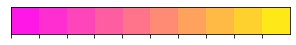

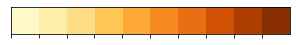

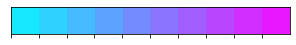

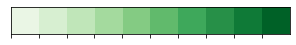

In [13]:
for pal in ["spring", "YlOrBr", "cool", "Greens"]:
    sns.palplot(sns.color_palette(pal, 10), .5)

Seaborn has 4 built-in **perceptually uniform** sequential color maps (`mako`, `rocket`, `crest`, and `flare`) in addition to the 5 defined in matplotlib (`viridis`, `cividis`, `magma`, `plasma`, and `inferno`).

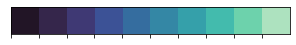

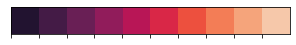

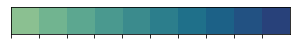

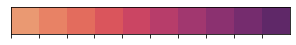

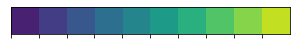

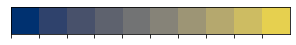

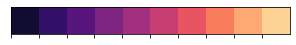

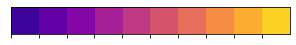

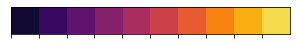

In [14]:
for pal in ["mako", "rocket", "crest", "flare", "viridis", "cividis", "magma", "plasma", "inferno"]:
    sns.palplot(sns.color_palette(pal, 10), .5)

**Cubehelix** color maps takes the idea of perceptual uniformity one step further by also guaranteeing that the gradient is uniform when rendered in greyscale. This is great for b+w prints and for colorblindness.

In [15]:
sns.color_palette("cubehelix", 10)

[(0.09854228363950114, 0.07115215572295082, 0.16957891809124037),
 (0.09159726558869188, 0.20394337960213008, 0.29623965888210324),
 (0.09406611799930162, 0.3578871412608098, 0.2837709711722866),
 (0.23627685553553793, 0.46114369021199075, 0.19770731888985724),
 (0.49498740849493095, 0.4799034869159042, 0.21147789468974837),
 (0.7354526513473981, 0.4748861903571046, 0.40254094042448907),
 (0.8325928529853291, 0.5253446757844744, 0.6869376931865354),
 (0.7936920632275369, 0.6641337211433709, 0.9042311843062529),
 (0.7588424692372241, 0.8253990353420474, 0.9542699331220588),
 (0.8385645211683802, 0.9411869386771845, 0.9357655639413166)]

In [16]:
sns.cubehelix_palette(10, start=.5, rot=-.5)

[[0.7611058395410276, 0.897713045748989, 0.8454349452836011],
 [0.6475389924250959, 0.8312061179534195, 0.7988690531356617],
 [0.5516174331469553, 0.7533438201390327, 0.765085969337711],
 [0.47599829224141754, 0.6647212472467017, 0.7336470666017856],
 [0.41944085427823424, 0.5678340676140039, 0.6945501868189554],
 [0.3790627817754598, 0.4716977553188698, 0.6429510329318763],
 [0.34351942619215814, 0.3706877966569698, 0.5686561064138482],
 [0.306349241555757, 0.27452187508371506, 0.47281619224112104],
 [0.258495235421288, 0.18722914407204005, 0.3585211949837789],
 [0.19219588654040817, 0.11144874684946916, 0.2327834607416993]]

In [17]:
sns.color_palette("ch:start=.5,rot=-.5,hue=.5", 10)

[(0.7948087967719658, 0.8801883006519416, 0.8475144878610742),
 (0.6944177526186261, 0.8092097060738284, 0.7889990405627297),
 (0.6050550133639059, 0.7311340052339542, 0.7384728484831282),
 (0.5283812855920624, 0.6463331324703651, 0.6894117695672924),
 (0.4636211221591905, 0.5563668804940465, 0.6355644549971412),
 (0.41044365037436825, 0.4683405088389995, 0.5753738073471286),
 (0.35881728842892235, 0.37579751996942967, 0.4995277135674786),
 (0.3061741583252893, 0.2862820542802631, 0.4102160025036418),
 (0.24685363978536382, 0.20231233269208385, 0.3093698645119206),
 (0.17600478202893158, 0.12553781972209468, 0.20137201590473852)]

Lastly **divergent** color maps are very useful when your data has a well-defined, meaningful midpoint or threshold that you want to highlight:

In [18]:
sns.color_palette("Spectral", 10)

[(0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865)]

In [19]:
sns.color_palette("coolwarm", 10)

[(0.3383765114431373, 0.45281860883137254, 0.8793170768784313),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.8301865219490197, 0.30473276355294115, 0.25489142806666665)]

In [20]:
# perceptually uniform
sns.color_palette("vlag", 10)

[(0.34125337, 0.50923419, 0.73874905),
 (0.49566225, 0.60454154, 0.76238852),
 (0.64061445, 0.70437326, 0.80497621),
 (0.79159841, 0.81658489, 0.86776906),
 (0.93827772, 0.9322888, 0.94432312),
 (0.96784372, 0.91616744, 0.91126063),
 (0.90235365, 0.77267117, 0.76467793),
 (0.84190106, 0.62760645, 0.61740899),
 (0.7862306, 0.49245398, 0.48267247),
 (0.72743485, 0.35773314, 0.35378465)]

In [21]:
# custom
sns.diverging_palette(250, 30, s=99, l=65, center="dark", n=10)

[(0.30333210366809527, 0.629208174731071, 0.99625585181397),
 (0.2668380379908195, 0.5231597318535448, 0.8139828559389387),
 (0.23034397231354375, 0.41711128897601857, 0.6317098600639073),
 (0.19189741302755772, 0.30538907686808897, 0.43968495376503736),
 (0.15540334735028197, 0.1993406339905627, 0.2574119578900059),
 (0.25495361887621426, 0.17832084102122892, 0.12275049800980606),
 (0.4303894069785794, 0.25412340524029225, 0.10186171314876666),
 (0.6152113034427272, 0.3339815335466897, 0.07985534332759771),
 (0.7906470915450924, 0.409784097765753, 0.058966558466558294),
 (0.9660828796474575, 0.4855866619848163, 0.0380777736055189)]

All of the sequential/diverging colormaps from Matplotlib per the [docs](https://matplotlib.org/stable/gallery/color/colormap_reference.html):
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_001_2_0x.png" width=600>
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_002_2_0x.png" width=600>
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_003_2_0x.png" width=600>
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_004_2_0x.png" width=600>
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_005_2_0x.png" width=600>
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_007_2_0x.png" width=600>

## 2.5 More resources on color
- https://www.boronine.com/2012/03/26/Color-Spaces-for-Human-Beings/
- https://colorbrewer2.org/
- https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
- https://matplotlib.org/2.0.2/users/colormaps.html
- https://www.axismaps.com/guide/using-colors-on-maps

# 3. Interactive Plotting in Python

Types of interactivity you might consider:
- annotation on hover/click
- pan-and-zoom
- data filters: buttons, sliders, and drop-down menu
- animation

Don't add interactivity for the sake of interactivity!

## 3.1 Plotly
https://plotly.com/python/

Plotly is a fantastic library for generating interactive versions of all of the types of plots/charts we've been looking at.


In [30]:
%%html
<iframe src="https://plotly.com/python/" width=100% height=700></iframe>

In [32]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

### 3.1.1. Embed plotly charts as .html

Plotly makes it easy to embed interactive charts into static webpages. After generating your plot, all you have to do is run the following command to convert everything (including the data!) to .html.

In [33]:
print(plotly.offline.plot(fig, include_plotlyjs='cdn', output_type='div'))

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="b0817ee8-d6a3-4d1b-b818-be2b27bda75a" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("b0817ee8-d6a3-4d1b-b818-be2b27bda75a")) {                    Plotly.newPlot(                        "b0817ee8-d6a3-4d1b-b818-be2b27bda75a",                        [{"hovertemplate":"<b>%{hovertext}</b><br><br>continent=Asia<br>year=1952<br>gdpPercap=%{x}<br>lifeExp=%{y}<br>pop=%{marker.size}<extra></extra>","hovertext":["Afghanistan","Bahrain","Bangladesh","Cambodia","China","Hong Kong, China","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Korea, Dem. Rep.","Korea, Rep.","Kuwait","L

## 3.2 ipywidgets

Installation instructions [here](https://ipywidgets.readthedocs.io/en/stable/user_install.html)

### 3.2.1. Basics

In [35]:
def sq_num(x):
    return x**2

interact(sq_num, x=10); #defaul of interact is a slider, acting as an independant variable.  
##"sq_num" is a python command

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [36]:
a = interact(sq_num, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [37]:
interact(sq_num, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [38]:
widgets.IntSlider()

IntSlider(value=0)

### 3.2.2. Interactive Pivot Table

Re-create the merged SF1 Craigslist data

In [39]:
rentals = pd.read_csv(
    'data/sfbay_geocoded.csv',
    usecols=['rent', 'bedrooms', 'sqft', 'fips_block', 'longitude', 'latitude'],
    dtype={'fips_block': str}  # load fips_block as str, numeric type will drop leading zero
)

sf1 = pd.read_hdf('data/bay_sf1_small.h5', 'sf1_extract')

county_fips_to_name = {
    '001': 'Alameda', '013': 'Contra Costa', '041': 'Marin', '055': 'Napa', '075': 'San Francisco',
    '081': 'San Mateo', '085': 'Santa Clara', '095': 'Solano', '097': 'Sonoma'}
sf1.insert(4, 'county_name', sf1['county'].replace(county_fips_to_name))

sf1['pct_rent'] = sf1['H0040004'] / sf1['H0040001'] * 100
sf1['pct_black'] = sf1['P0030003'] / sf1['P0030001'] * 100
sf1['pct_asian'] = sf1['P0030005'] / sf1['P0030001'] * 100
sf1['pct_white'] = sf1['P0030002'] / sf1['P0030001'] * 100
sf1['pct_hisp'] = sf1['P0040003'] / sf1['P0040001'] * 100
sf1['pct_vacant'] = sf1['H0050001'] / sf1['H00010001'] * 100
sf1['pop_sqmi'] = (sf1['P0010001'] / (sf1['arealand'] / 2589988))
sf1 = sf1[sf1['P0030001'] > 0]  # drop unpopulated census blocks

rentals_sf1 = pd.merge(rentals, sf1, left_on='fips_block', right_on='blockfips')

In [40]:
def pivot_intx(value_col, group_col, hue_col, agg_func):

    piv_df = pd.pivot_table(rentals_sf1, values=value_col, index=group_col, columns=hue_col, aggfunc=agg_func)
    fig, ax = plt.subplots(figsize=(12,7))
    _ = piv_df.plot(
        kind='bar', figsize=(14,6), title='Average {0} by {1} and {2}'.format(value_col, group_col, hue_col),
        ax=ax)

    return

In [41]:
group_col_selector = widgets.Dropdown(
    options=rentals_sf1.columns.tolist(),
    description='group by:',
    value='bedrooms'
)

hue_col_selector = widgets.Dropdown(
    options=rentals_sf1.columns.tolist(),
    description='hue:',
    value='county_name'
)

value_col_selector = widgets.Dropdown(
    options=rentals_sf1.columns.tolist(),
    description='value:',
    value='rent'
)

agg_func_selector = widgets.RadioButtons(
    options=['count', 'sum', 'mean', 'median'],
    value="mean",
    description='agg function:',
)

In [43]:
interact(
    pivot_intx,
    value_col=value_col_selector,
    group_col=group_col_selector,
    hue_col=hue_col_selector,
    agg_func=agg_func_selector
);

interactive(children=(Dropdown(description='value:', options=('rent', 'bedrooms', 'sqft', 'longitude', 'latitu…

## 3.3 Bokeh
https://bokeh.org/

Kind of like Plotly, but uses a different JavaScript library for charts

In [44]:
%%html
<iframe src="https://demo.bokeh.org/"  width=100% height=700></iframe>

### 3.3.1 A different approach to the grouped bar plot

In [45]:
rentals_sf1['bedrooms'] = rentals_sf1['bedrooms'].astype(str)
group = rentals_sf1.groupby(['bedrooms','county_name'])
source = ColumnDataSource(group)

output_notebook()
p = figure(plot_width=800, plot_height=300, title="Rent x Bedrooms x County",
           x_range=group, toolbar_location=None, tools="")

p.vbar(x='bedrooms_county_name', top='rent_mean', width=1, source=source,
       line_color="white",
       hover_line_color="darkgrey", )

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2
p.add_tools(HoverTool(tooltips=[("rent", "@rent_mean"), ("bedrooms, county_name", "@bedrooms_county_name")]))

Loading BokehJS ...

In [46]:
show(p)

In [47]:
output_file("plot.html")

In [48]:
show(p)

## 3.4 More
- https://panel.holoviz.org/ (dashboards with Bokeh)
- https://streamlit.io/ (standalone apps and dashboards)
- https://voila-gallery.org/ (another library for converting Jupyter Notebooks into dashboards)

# 4. For next time
- Assignment 3 due tomorrow
- Assignment 4: Project Proposals

# 5. Questions?